#Melanoma Detection Assignment

Importing Libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
#Setup the mount to google drive

from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [3]:
#Unzipping the zipped folder of dataset
!unzip -q /content/gdrive/My\ Drive/CNN_assignment

In [4]:
!ls


 gdrive   sample_data  'Skin cancer ISIC The International Skin Imaging Collaboration'


In [5]:
!ls "Skin cancer ISIC The International Skin Imaging Collaboration"

Test  Train


It has total 2357 images. It contains 9 categories in each Train and Test data set folders

In [6]:
# Setting up the path for Train and Test data sets

data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [7]:
# Printing the count of images in each directory
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Train images:\t", image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("Test images:\t", image_count_test)

Train images:	 2239
Test images:	 118


We will be using keras.preprocessing to load these images . image_dataset_from_directory utility can be used from keras library for this task


Setting up the parameters and creating data set:

In [8]:
#Setting up parameters for batch size and image height and width as per assignment question
batch_size = 32
img_height = 180
img_width = 180

In [9]:
## Setting up the train dataset here
## Using seed=123 while creating dataset using tf.keras.preprocessing.image_dataset_from_directory
## Resize the images as per parameter set above with the parameters( img_height*img_width)
## Will be using 80% for training and 20% images for validation
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [10]:
## Setting up the Validation dataset here
## Using seed=123 while creating dataset using tf.keras.preprocessing.image_dataset_from_directory
## Resize the images as per parameter set above with the parameters( img_height*img_width)
## Will be using 80% for training and 20% images for validation
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
# Use the class_names attribute to identify the class names and store in a list
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


**Data Visualization**

Use the matplot lib to visualize the data

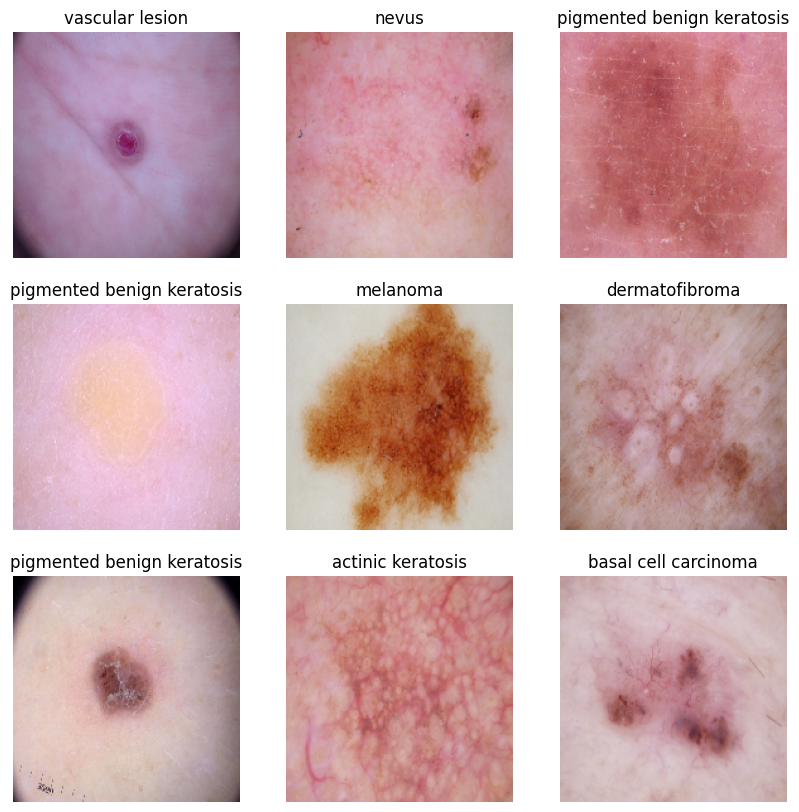

In [12]:
#Let us take one instance from each categories to visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


####  Creating a CNN model, which can accurately detect 9 classes present in the dataset. We can use ```layers.experimental.preprocessing.Rescaling``` to normalize the pixel values between (0,1).

In [14]:
### Your code goes here
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Compiling the model and chosing the optimizer

In [15]:
### Using 'ADAM' optimiser which is the most preferred as it can tune the learning rate automatically
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

Train the model with epoch =20.

In [17]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 28s 89ms/step - loss: 2.0600 - accuracy: 0.2857 - val_loss: 1.7847 - val_accuracy: 0.3669
Epoch 2/20
56/56 [==============================] - 1s 21ms/step - loss: 1.6006 - accuracy: 0.4386 - val_loss: 1.5174 - val_accuracy: 0.5011
Epoch 3/20
56/56 [==============================] - 1s 21ms/step - loss: 1.3852 - accuracy: 0.5190 - val_loss: 1.4950 - val_accuracy: 0.5190
Epoch 4/20
56/56 [==============================] - 1s 21ms/step - loss: 1.3343 - accuracy: 0.5084 - val_loss: 1.4681 - val_accuracy: 0.5280
Epoch 5/20
56/56 [==============================] - 1s 21ms/step - loss: 1.2477 - accuracy: 0.5525 - val_loss: 1.3941 - val_accuracy: 0.5391
Epoch 6/20
56/56 [==============================] - 1s 21ms/step - loss: 1.1659 - accuracy: 0.5904 - val_loss: 1.3682 - val_accuracy: 0.5280
Epoch 7/20
56/56 [==============================] - 1s 21ms/step - loss: 1.1076 - accuracy: 0.6049 - val_loss: 1.3355 - val_accuracy: 0.5503
Epoch 8/20
5

Visualizing the Train Model by tracking the Training accuracy vs Validation accuracy

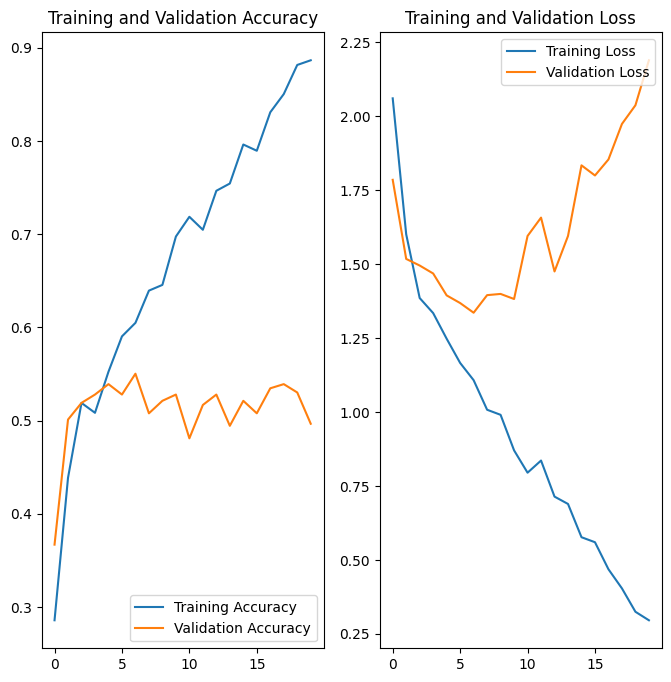

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In the plots above, the training accuracy is increasing linearly over time, while the validation accuracy stays around 54% in the training process. Additionally the difference between train accuracy and validation accuracy is significantly high. Hence it is a case of Overfitting.

In [19]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# We used data transformation techniques using RandomFLip or RandomRotation or RandomZoom
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

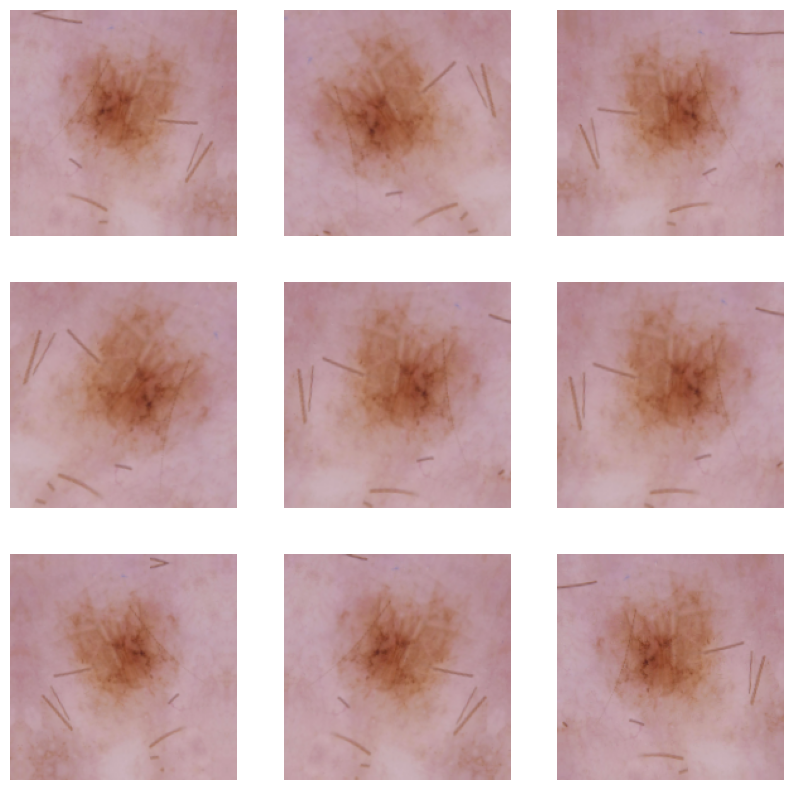

In [20]:
# visualize how your augmentation strategy works for one instance of training image.
# CHecking the augmentation on the image for one image instance

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

Create, compile and train the model

In [21]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


Compiling the model using the 'adam' optimiser

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train the model again with epoch=20

In [23]:
## Train the model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 5s 33ms/step - loss: 1.9831 - accuracy: 0.2539 - val_loss: 1.7908 - val_accuracy: 0.3893
Epoch 2/20
56/56 [==============================] - 2s 29ms/step - loss: 1.6576 - accuracy: 0.3912 - val_loss: 1.5778 - val_accuracy: 0.4295
Epoch 3/20
56/56 [==============================] - 2s 29ms/step - loss: 1.5225 - accuracy: 0.4548 - val_loss: 1.4754 - val_accuracy: 0.4899
Epoch 4/20
56/56 [==============================] - 2s 29ms/step - loss: 1.4102 - accuracy: 0.5039 - val_loss: 1.4542 - val_accuracy: 0.5145
Epoch 5/20
56/56 [==============================] - 2s 29ms/step - loss: 1.3455 - accuracy: 0.5296 - val_loss: 1.3862 - val_accuracy: 0.5302
Epoch 6/20
56/56 [==============================] - 2s 31ms/step - loss: 1.3769 - accuracy: 0.5240 - val_loss: 1.3754 - val_accuracy: 0.5280
Epoch 7/20
56/56 [==============================] - 2s 32ms/step - loss: 1.2638 - accuracy: 0.5469 - val_loss: 1.4302 - val_accuracy: 0.5391
Epoch 8/20
56

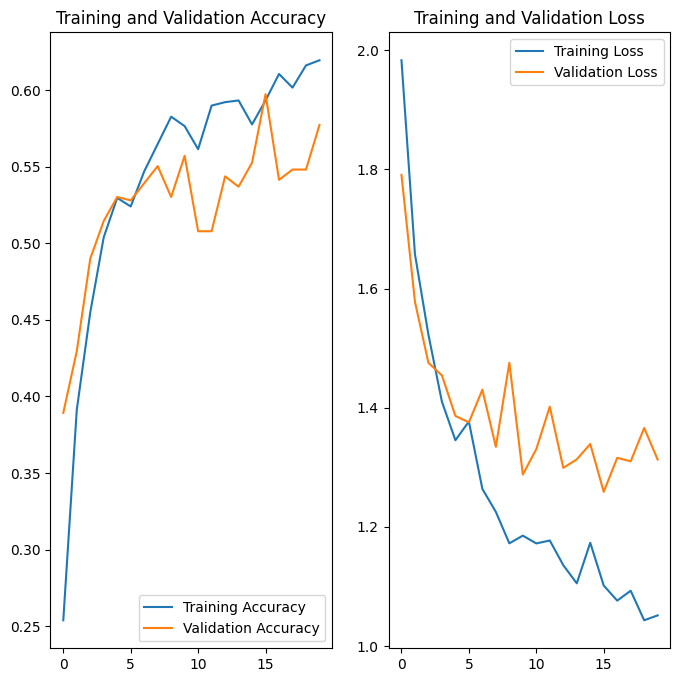

In [24]:
#Visualizing the results after augmentation process

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In the above graph, we can see that the difference in Training and Validation accuracy has significantly reduced. SO this seems to be a better fit than the previous model

Now, let us Check the distribution of classes to identify Class Imbalance

In [25]:

from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [26]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,pigmented benign keratosis
1,Skin cancer ISIC The International Skin Imagin...,pigmented benign keratosis
2,Skin cancer ISIC The International Skin Imagin...,pigmented benign keratosis
3,Skin cancer ISIC The International Skin Imagin...,pigmented benign keratosis
4,Skin cancer ISIC The International Skin Imagin...,pigmented benign keratosis
...,...,...
2234,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2235,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2236,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2237,Skin cancer ISIC The International Skin Imagin...,vascular lesion


Class=5, n=462 (20.634%)
Class=0, n=114 (5.092%)
Class=4, n=357 (15.945%)
Class=2, n=95 (4.243%)
Class=3, n=438 (19.562%)
Class=6, n=77 (3.439%)
Class=1, n=376 (16.793%)
Class=7, n=181 (8.084%)
Class=8, n=139 (6.208%)


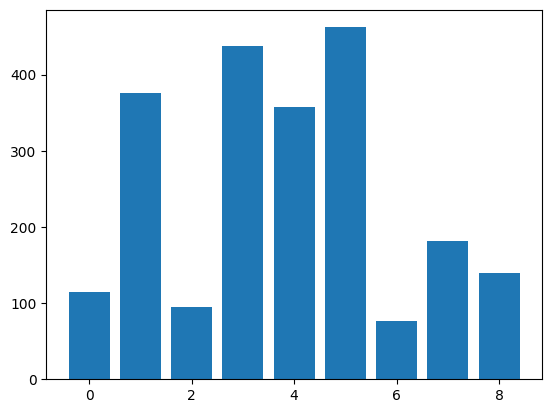

In [27]:
# Will use sklearn library to identify class and its corresponding samples


from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

## We can see that Class 6 has least samples of 77 and Class 5 has highest of 462. This is a case of CLass Imbalance and the class with more samples may impact the model and class with lesser samples like Class 0,2 and 6 will be ignored. Hence we should try to handle this class imbalance to generate a better model

## Using Augmentor, we can add more samples to reduce the impact of class imbalance

In [28]:
!pip install Augmentor

In [29]:
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to reduce class imbalance

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FEFC40D6B60>: 100%|██████████| 500/500 [00:19<00:00, 25.56 Samples/s]


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FEFC41A8A60>: 100%|██████████| 500/500 [00:20<00:00, 24.12 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF0601219C0>: 100%|██████████| 500/500 [00:20<00:00, 24.04 Samples/s]


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FEFC413FD00>: 100%|██████████| 500/500 [01:23<00:00,  6.01 Samples/s]


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FEFC8F0BD00>: 100%|██████████| 500/500 [01:18<00:00,  6.34 Samples/s]


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FEFB8747790>: 100%|██████████| 500/500 [00:16<00:00, 30.99 Samples/s]


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FEFB87046A0>: 100%|██████████| 500/500 [00:39<00:00, 12.73 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FEFB8717F10>: 100%|██████████| 500/500 [00:15<00:00, 32.30 Samples/s]


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FF0601208E0>: 100%|██████████| 500/500 [00:16<00:00, 31.01 Samples/s]


In [30]:
#Lets check the total count created by AUgmentor

image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


CHeck the distribution of data after augmentor

In [31]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025103.jpg_89385115-8bf4-412e-988f-65d837cdbf14.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0024602.jpg_8ce6ec01-97db-4a02-84bb-22f245a730a6.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0024748.jpg_75353dee-20f8-45b6-aef7-927098d44386.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026444.jpg_0e1eadd1-6a4a-4894-8eef-d51b41c7d7f7.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026416.jpg_29d17a94-0401-4319-ac53-83e62f47efe0.jpg',


In [32]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmen

In [33]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [34]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-34-17a6b079869a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [35]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

### We have added 500 additional samples
## Train the model on Augmented data

In [36]:
# Setting up the parameters
batch_size = 32
img_height = 180
img_width = 180

Create a Train data set

In [37]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [38]:
# Creating a validation data set

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [39]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [40]:
## Using 'adam' optimizer and compiling the model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
# Train the model with epochs 30 as per assignment

epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 45s 57ms/step - loss: 1.9417 - accuracy: 0.2756 - val_loss: 1.5330 - val_accuracy: 0.4209
Epoch 2/30
169/169 [==============================] - 5s 31ms/step - loss: 1.4147 - accuracy: 0.4662 - val_loss: 1.3478 - val_accuracy: 0.4922
Epoch 3/30
169/169 [==============================] - 5s 29ms/step - loss: 1.2103 - accuracy: 0.5497 - val_loss: 1.1249 - val_accuracy: 0.5664
Epoch 4/30
169/169 [==============================] - 5s 28ms/step - loss: 1.0101 - accuracy: 0.6261 - val_loss: 1.0855 - val_accuracy: 0.6013
Epoch 5/30
169/169 [==============================] - 5s 31ms/step - loss: 0.8343 - accuracy: 0.6999 - val_loss: 0.9850 - val_accuracy: 0.6563
Epoch 6/30
169/169 [==============================] - 5s 28ms/step - loss: 0.6489 - accuracy: 0.7682 - val_loss: 0.8062 - val_accuracy: 0.7157
Epoch 7/30
169/169 [==============================] - 5s 30ms/step - loss: 0.5459 - accuracy: 0.8071 - val_loss: 0.8685 - val_accuracy: 0.715

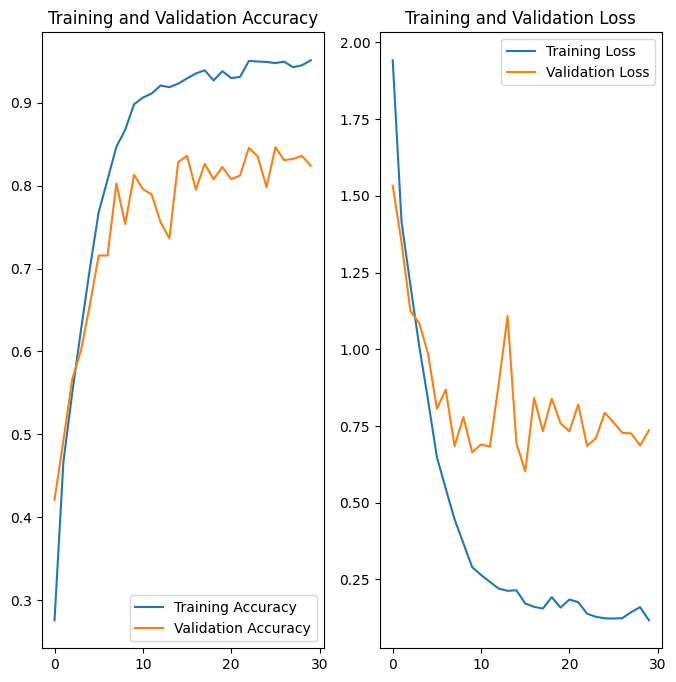

In [42]:
# Visualizing the results after handling Class Imbalance

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

This is a better fit model and reducing the Class Imbalance factor has helped to make better fitting model. We know that when we pass through epoch, model with the last accuracy is considered. However we can use Callback API to pick the model with the best accuracy.